## Задача 1. 60 баллов
Работаем с датасетом https://disk.yandex.ru/d/P6u1Za-nnmtwPA
Скачайте его.

Оцениваем факторы, которые влияют на цену на аренду в Москве.
Описание столбцов:

**metro** - ближайшая станция метро

**price** - цена за аренды


**minutes** - расстояние до метро в минутах

**way** - пусть до метро (пешком или на транспорте)

**views** - просмотры квартиры

**provider** - кто сдает квартиру (собственник, риелтор, застройщик)

**fee_percent** - процент, который получает риелтор

**storey**- этаж

**storeys**- число этажей в здании

**living_area** - жилая площаль

**kitchen_area** - площадь кухни

**total_area** - общая площадь


#### Часть 1. EDA. 10 баллов

In [2]:
import pandas as pd
df = pd.read_csv('rent.csv', index_col=0)

1. Отобразите первые 5 и последние 5 строк. (**1**)

In [5]:
df.head(5)

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40


In [7]:
df.tail(5)

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
1441,Solntcevo,25000,walk,189,realtor,0,6,5,23,20,10,36
1442,Ulitca Starokachalovskaia,25000,walk,173,realtor,0,5,5,17,20,10,38
1443,Zhulebino,25000,walk,102,realtor,0,5,5,12,20,10,35
1444,Preobrazhenskaia ploshchad,40000,walk,60,realtor,30,3,17,9,20,8,35
1445,Rasskazovka,30000,walk,2728,owner,0,12,10,17,22,8,33


In [9]:
df.shape

(1446, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1445
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   metro         1446 non-null   object
 1   price         1446 non-null   int64 
 2   way           1446 non-null   object
 3   views         1446 non-null   int64 
 4   provider      1446 non-null   object
 5   fee_percent   1446 non-null   int64 
 6   storey        1446 non-null   int64 
 7   minutes       1446 non-null   int64 
 8   storeys       1446 non-null   int64 
 9   living_area   1446 non-null   int64 
 10  kitchen_area  1446 non-null   int64 
 11  total_area    1446 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 146.9+ KB


2. Посчитайте описательные статистики числовых переменных с помощью describe() (**1**)

In [14]:
df.describe(include='number')

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,43770.738589,417.917012,37.949516,7.089903,8.753804,22.545643,20.585754,11.369986,37.265560
std,33232.151532,936.532913,26.893347,16.511552,4.710759,347.279854,5.608993,8.083777,6.143386
min,14000.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,1.000000
25%,29000.000000,38.000000,0.000000,4.000000,5.000000,9.000000,18.000000,7.000000,34.000000
50%,38000.000000,103.000000,50.000000,6.000000,7.000000,12.000000,20.000000,10.000000,37.000000
75%,45000.000000,414.000000,50.000000,9.000000,12.000000,16.000000,21.000000,10.000000,40.000000
max,500000.000000,5174.000000,100.000000,613.000000,47.000000,13217.000000,37.000000,37.000000,57.000000


3. Посчитайте статистики по категориальным переменным. Сколько уникальных значений у переменной metro? (**1**)

In [17]:
df.describe(include='object')

,metro,way,provider
count,1446,1446,1446
unique,119,2,7
top,Planernaia,walk,realtor
freq,126,1331,615


У переменной метро 119 уникальных значений

4. Есть ли в датасете пропуски? (**1**)

In [21]:
df.isna().sum()

metro           0
price           0
way             0
views           0
provider        0
fee_percent     0
storey          0
minutes         0
storeys         0
living_area     0
kitchen_area    0
total_area      0
dtype: int64

В датасете нет пропусков

5. Есть ли в датасете полные дубликаты? (**1**)

In [25]:
df.duplicated().sum()

1201

В датасете довольно много полных дублей

In [28]:
df.drop_duplicates(inplace = True)

In [30]:
len(df)

245

Если убрать полные дубли из датасета, то останется всего 245 уникальных строк

6. Сколько уникальных значений у переменной provider? Есть ли со значениями этой переменной какие-нибудь проблемы? Если да, то как их исправить? (**1**)

> Ответ текстом

Всего уникальных знвчений 7. Однако это только исходя из описательных статистик

In [36]:
df.provider.value_counts()

provider
agency                           90
Застройщик                       68
owner                            38
realtor                          16
realtor                          15
agency                           10
agency                            8
Name: count, dtype: int64

In [38]:
df.provider.unique()

array(['realtor                \xa0 \xa0 ', 'owner                 ',
       'realtor                 ',
       'agency                \xa0 \xa0\xa0 \xa0 ',
       'agency                \xa0 \xa0 ', 'agency                 ',
       'Застройщик                 '], dtype=object)

Как можно можно заметить уникальных значений переменной `provider` меньше, чем об этом говорит описательная статистика, так как среди её значений встречаются повторяющиеся значения, но со спец символами и лишними пробелами. Исправить эту ситуацию можно с помощью регулярных выражений.

In [41]:
import re
df.provider = df.provider.apply(lambda x: re.sub(r'\xa0+', '', x).strip())

In [43]:
df.provider.value_counts()

provider
agency        108
Застройщик     68
owner          38
realtor        31
Name: count, dtype: int64

7. Постройте гистограммы распределения всех числовых переменных. Не забудьте подписать график и оси. (**1**)

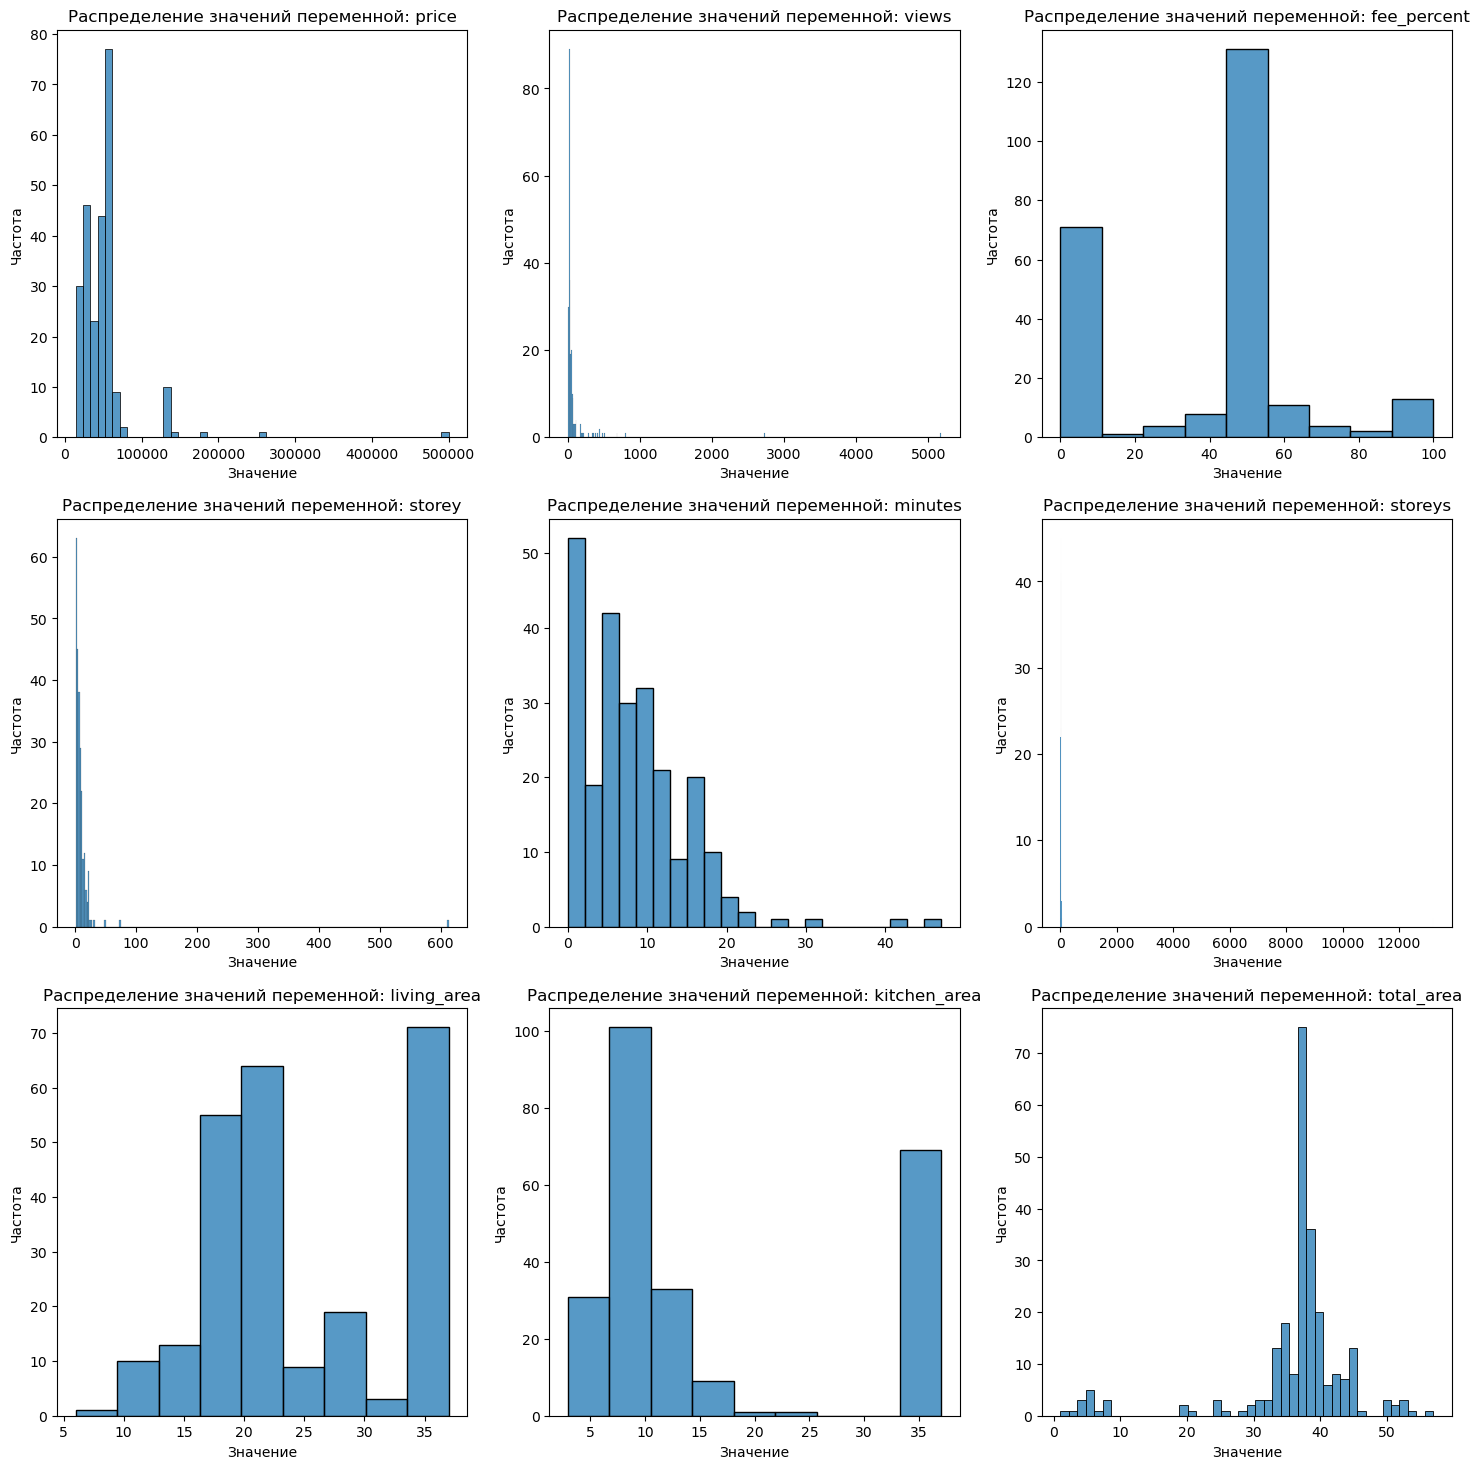

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include='number').columns

fig, axes = plt.subplots(3,3, figsize = (18,18))
j = 0
for i in np.arange(0,9,3):
    sns.histplot(data=df, x = numeric_columns[i], ax=axes[j, 0])
    sns.histplot(data=df, x = numeric_columns[i+1], ax=axes[j, 1])
    sns.histplot(data=df, x = numeric_columns[i+2], ax=axes[j, 2])
    axes[j, 0].set_title(f'Распределение значений переменной: {numeric_columns[i]}')
    axes[j, 0].set_ylabel('Частота')
    axes[j, 0].set_xlabel('Значение')
    axes[j, 1].set_title(f'Распределение значений переменной: {numeric_columns[i+1]}')
    axes[j, 1].set_ylabel('Частота')
    axes[j, 1].set_xlabel('Значение')
    axes[j, 2].set_title(f'Распределение значений переменной: {numeric_columns[i+2]}')
    axes[j, 2].set_ylabel('Частота')
    axes[j, 2].set_xlabel('Значение')
    j+=1
        
plt.show()   

8. Нарисуйте scatterplot всех пар переменных с помощью sns.pairplot. (**1**)

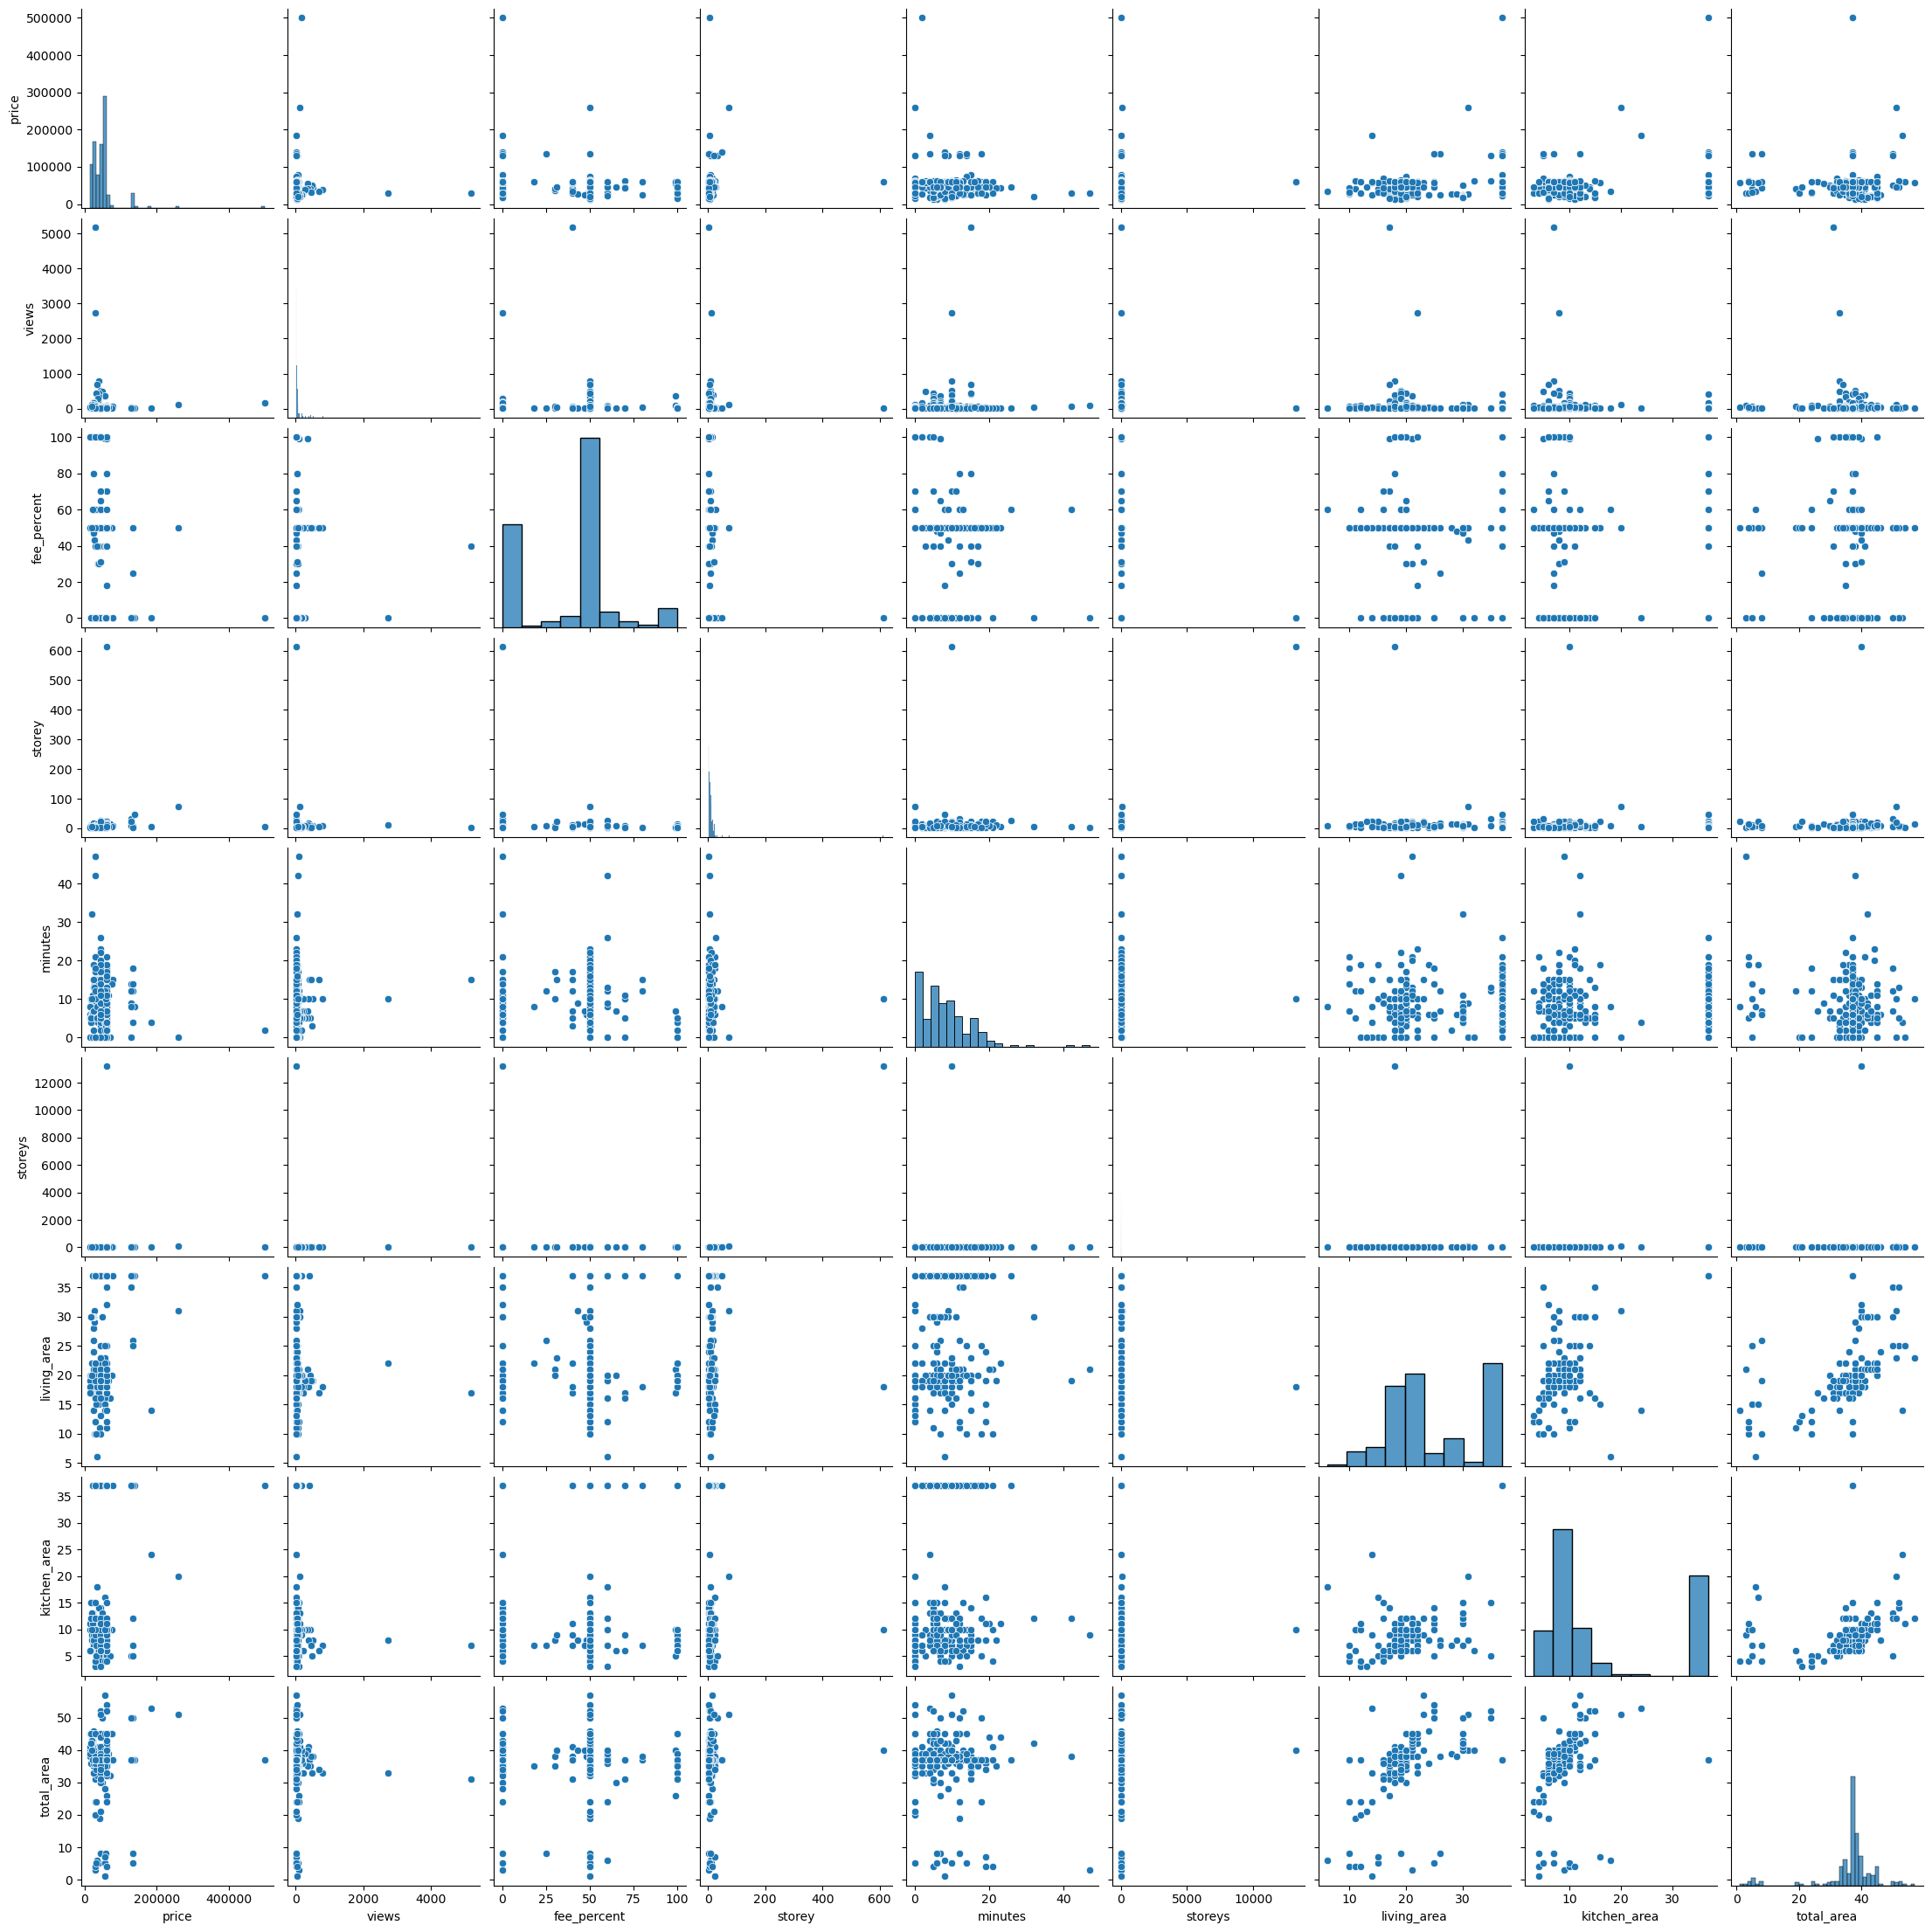

In [48]:
sns.pairplot(df)
plt.show()

9. Постройте таблицу корреляций и тепловую карту числовых переменных. Между какими переменными наблюдается линейная связь? (**2**)

In [50]:
df.corr(numeric_only=True)

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
price,1.000000,-0.046706,-0.159946,0.070441,-0.074924,0.018541,0.211085,0.243515,0.006046
views,-0.046706,1.000000,-0.026805,-0.019725,0.078572,-0.013235,-0.103415,-0.106179,-0.037596
fee_percent,-0.159946,-0.026805,1.000000,-0.087791,-0.043229,-0.089446,-0.287182,-0.217804,-0.049272
storey,0.070441,-0.019725,-0.087791,1.000000,0.027628,0.982579,-0.048015,-0.040404,0.039210
minutes,-0.074924,0.078572,-0.043229,0.027628,1.000000,0.018024,-0.016318,-0.006020,-0.142629
storeys,0.018541,-0.013235,-0.089446,0.982579,0.018024,1.000000,-0.051725,-0.034357,0.027002
living_area,0.211085,-0.103415,-0.287182,-0.048015,-0.016318,-0.051725,1.000000,0.885334,0.314532
kitchen_area,0.243515,-0.106179,-0.217804,-0.040404,-0.006020,-0.034357,0.885334,1.000000,0.142474
total_area,0.006046,-0.037596,-0.049272,0.039210,-0.142629,0.027002,0.314532,0.142474,1.000000


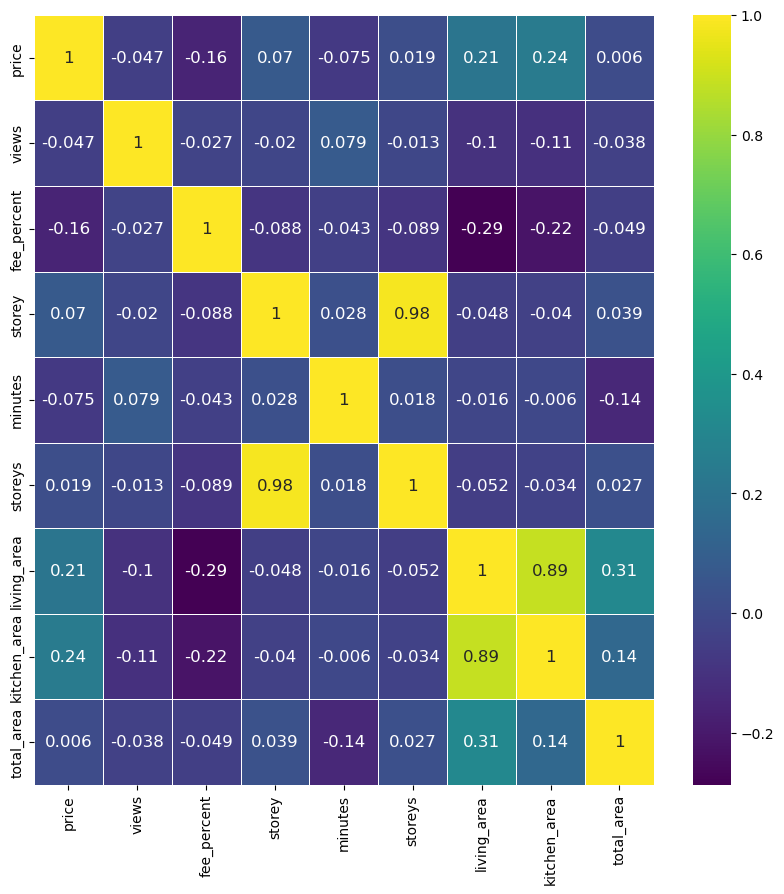

In [51]:
fig , ax = plt.subplots(figsize = (10,10))

sns.heatmap(df.corr(numeric_only=True),
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})
plt.show()

> Ответ текстом

Хоть что-то похожее на линейную связь можно увидеть между переменными `living_area` и `kitchen_area` как на scatter plot так и в таблице и тепловой карте. В этом похоже нет ничего удивительного, так как можно предположить, что с увеличением жилой площади довольно часто увеличивается и площадь кухни. Так же можно заметить, что переменная `price` относительно сильно коррелирует с переменной `kitchen_area`.

По хорошему наверное стоит смотреть на корреляцию различных параметров для каждого отдельного района или ближайшего метро.

Посмотрим на тепловую карту только для квартир, которые расположены в наиболее часто встречающемся метро в выборке

In [56]:
df.metro.value_counts()

metro
No data                   36
 Buninskaia Alleia        13
 Salarevo                  9
 Rasskazovka               8
 Planernaia                6
                          ..
 Partizanskaia             1
 Dubrovka                  1
 Nagornaia                 1
 Ulitca Dmitrievskogo      1
 Kievskaia                 1
Name: count, Length: 119, dtype: int64

По подсчетам это метро планерная

In [59]:
df.metro = df.metro.apply(lambda x: re.sub(r'\xa0+', '', x).strip())
df.way = df.way.apply(lambda x: re.sub(r'\xa0+', '', x).strip())# на всякий случай применил и к этой переменной

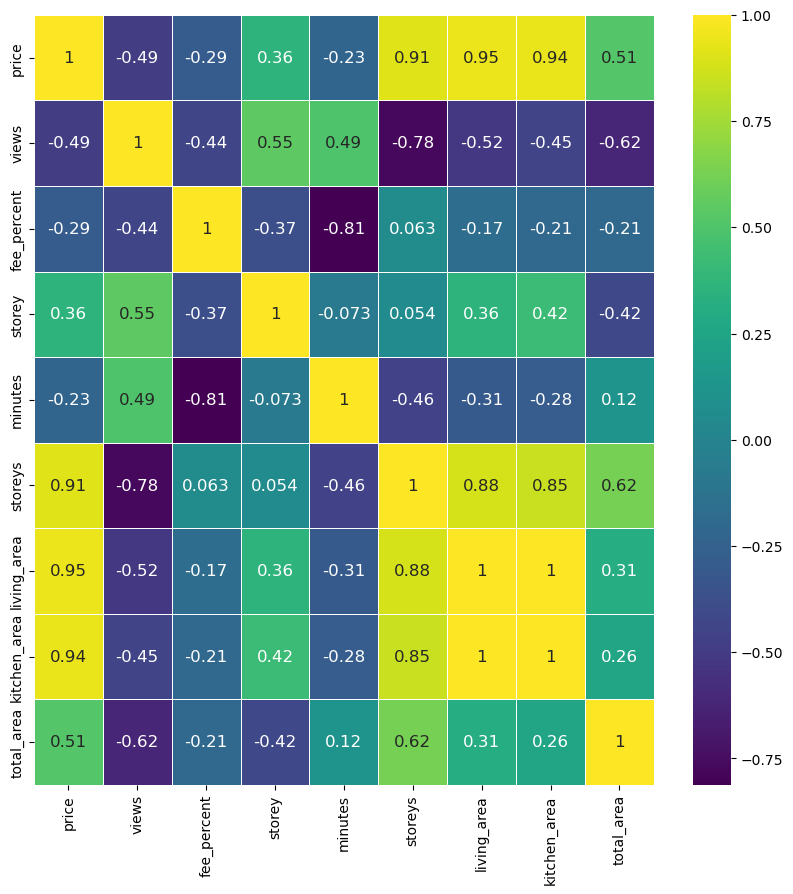

In [60]:
fig , ax = plt.subplots(figsize = (10,10))

sns.heatmap(df[df.metro == 'Planernaia'].corr(numeric_only=True),
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})
plt.show()

In [61]:
len(df[df.metro == 'Planernaia'])

6

#### Часть 2. Построение модели. 50 баллов

1. Раздйлите датасет на обучающую и тестовую выборку. Постройте линейную регрессию для переменной price, используя только числовые переменные. Перед этим стандартизируйте все независимые переменные с помощью StandardScaler. (**5**)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE,  root_mean_squared_error as RMSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

X = df[numeric_columns].drop(columns = ['price'])
y = df.price.to_numpy()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

2. Сделайте прогноз, посчитайте MSE и RMSE модели на тестовой выборке (**5**)

In [68]:
y_pred = lr1.predict(X_test)
print(f'MSE: {MSE(y_test, y_pred)}')
print(f'RMSE: {RMSE(y_test, y_pred)}')

MSE: 1033388127.7016578
RMSE: 32146.35481204141


3. Закодируйте переменные way	и	provider с помощью OneHotEncoding и добавьте их в модель. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

In [70]:
# по памяти удалил по одной бинарной переменной для разных класификаций
data = pd.get_dummies(data = df, columns=['way', 'provider'], drop_first=True, dtype=int)

numeric_columns = data.select_dtypes(include='number').columns

scaler = StandardScaler()

X = data[numeric_columns].drop(columns = ['price'])
y = data.price.to_numpy()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred = lr2.predict(X_test)
print(f'MSE: {MSE(y_test, y_pred)}')
print(f'RMSE: {RMSE(y_test, y_pred)}')

MSE: 1200186055.8668206
RMSE: 34643.70153241164


4. Удалите из обучающей выборке выбросы по цене (тестовую выборку не трогайте!) Выбросами считайте цены, которые дороже, чем $Q3+1.5 * IQR$, где $IQR$ - межквартильный размах, $Q3$ - 75 перцентиль. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

In [74]:
datac = pd.DataFrame(X_train)
datac['price'] = y_train

Q1 = datac['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

datac = datac[(datac['price'] > lower_bound)&(datac['price'] < upper_bound)]

X_train = datac.drop(columns = ['price']).to_numpy()
y_train = datac.price.to_numpy()

In [75]:
lr3 = LinearRegression()
lr3.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = lr3.predict(X_test)
print(f'MSE: {MSE(y_test, y_pred)}')
print(f'RMSE: {RMSE(y_test, y_pred)}')

MSE: 1062389718.457163
RMSE: 32594.320340469796


5. Попробуйте написать свою реализацию функций MSE, RMSE, R2. Функции должны принимать на вход numpy-массив истинных значений и предсказаний и возвращать результат. Примените функции к предсказаниям последней модели. Сравните результат с библиотечной реализацией. (**9**)

Напоминаем, что

${MSE}=\frac{1}{n} \sum_{i=1}^n \left(y_i-\hat{y_i}\right)^2$, где $y_i$ - истинное значение на i-ом наблюдении, $\hat{y_i}$  - предсказание модели на i-ом наблюдении.

Также рекомендуем ознакомиться с документацией: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

R2 (коэффициент детерминации) - доля дисперсии, объясненная моделью. Поподробнее о реалиации можно почитать здесь: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

In [78]:
def myMSE(y_true, y_pred):
    # ваш код
    n = len(y_true)
    mse = sum((y_true - y_pred)**2)/len(y_true)
    return mse

In [79]:
myMSE(y_test, y_pred)

1062389718.4571631

In [80]:
def myRMSE(y_true, y_pred):
    # ваш код
    n = len(y_true)
    rmse = np.sqrt(sum((y_true - y_pred)**2)/len(y_true))
    return rmse

In [81]:
myRMSE(y_test, y_pred)

32594.320340469796

In [89]:
def myr2(y_true, y_pred):
    # ваш код
    r2 = 1 - (sum((y_true - y_pred)**2))/(sum((y_true - y_true.mean())**2))
    return r2

In [100]:
myr2(y_test, y_pred)

-0.01016670015502763

In [101]:
from sklearn.metrics import r2_score

In [106]:
r2_score(y_test, y_pred)

-0.01016670015502763

In [108]:
df.head()

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40


6. Напишите класс CleanData. Этот класс будет отвечать за заполнение пропусков и кодирование переменных методами OneHotEncoding и MeanTargetEncoding. (**15**). В классе обязательно должны присутствовать методы fit и transform. transform должен возвращать трансформированный датасет.
Пользователь при создании экземпляра класса может указывать:
- список столбцов для кодирования OneHotEncoding
- список столбцов для кодирования MeanTargetEncoding
- стратегию заполнения пропусков (заполнение средним / медианным значением и т.п.; можете принимать на вход словарь, чтобы реализовать разные стратегии для разных столбцов)

 Все остальные особенности реализации остаются на Ваше усмотрение.

In [114]:
from sklearn.base import BaseEstimator

class CleanData(BaseEstimator):
    def __init__(self, mean_cols = (), onehot_cols = (), fill_s = {}):
        self.onehot_cols = onehot_cols
        self.mean_cols = mean_cols
        self.fill_s = fill_s

    def fit(self, X, y):
        
        self.m_e = {}
        
        for i in self.mean_cols:
            X[i].str.strip()
            self.m_e[i] = pd.concat([X, y], axis = 1).groupby(i)[y.name].mean()

        return self

    def transform(self, X):

        df_ecv = pd.get_dummies(X, columns = self.onehot_cols, drop_first=True, dtype=int)
        for i in self.mean_cols:
            df_ecv[i] = df_ecv[i].str.strip()
            if self.fill_s == {}:
                df_ecv[f'{i}_m_enc'] = df_ecv[i].map(self.m_e[i]).fillna(y.median())
            else:
                df_ecv[f'{i}_m_enc'] = df_ecv[i].map(self.m_e[i]).fillna(y.agg(self.fill_s[i]))
            df_ecv.drop([i], axis=1, inplace = True)

        return df_ecv
                                                    
        
        

7. Создайте и обучите пайплайн из CleanData, StandardScaler, LinearRegression. Посчитайте метрики. **(6)**

In [117]:
df1 = df.copy()
X = df.drop(columns = ['price'])
y = df.price

Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df1 = df1[(df1['price'] > lower_bound)&(df1['price'] < upper_bound)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(
    steps = [
        ('encoder', CleanData(mean_cols=['metro'], onehot_cols = ['way', 'provider'], fill_s={'metro':'mean'})),
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]
)


In [121]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 CleanData(fill_s={'metro': 'mean'}, mean_cols=['metro'],
                           onehot_cols=['way', 'provider'])),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [123]:
y_pred = pipeline.predict(X_test)
print(f'MSE: {MSE(y_test, y_pred)}')
print(f'RMSE: {RMSE(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test, y_pred)}')

MSE: 1010675450.2925242
RMSE: 31791.122193035655
R^2: 0.039005492229015726


## Задача 2. (15 баллов)

### 2.1 (10)
Напишите код, который будет асинхронно загружать данные из нескольких веб-страниц. Используйте библиотеку aiohttp для выполнения HTTP-запросов. Программа должна выводить количество символов, загруженных из каждой страницы.

In [126]:
import asyncio
import aiohttp

async def fetch(url):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            return await response.text()

async def main(urls):
    tasks = [fetch(url) for url in urls]
    results =  await asyncio.gather(*tasks)

    for url, content in zip(urls, results):
        print(f"{url}: {len(content)} символов")
urls = [
        "https://www.python.org",
        "https://www.wikipedia.org"
        ###
    ]

await main(urls)

https://www.python.org: 50942 символов
https://www.wikipedia.org: 108300 символов


### 2.2 (**5**)

Какие ошибки могут возникнуть в процессе исполнения кода выше? Как их можно обработать? Добавьте обработку ошибок в Ваш код.

In [129]:
import asyncio
import aiohttp

async def fetch(url):
    try:
        async with aiohttp.ClientSession() as session:
#Добавлен параметр timeount на случай, если сервер будет слишком долго отвечать
            async with session.get(url, timeout = 10) as response:
                status = response.status
                if status == 200:
                    print(f'Код статуса: {status}')
                    return await response.text()
                else:
                    print(f'Код статуса: {status}')
                    return ''

#Добавлено на случай ошибок подкючений и запросов
    except aiohttp.ClientError as error:
        print(f"Ошибка подключения: {error} при запросе {url}")
        return ''
#Добавлено на случай сликшом долгого ожидания сервера      
    except asyncio.TimeoutError:
        print(f"Таймаут при запросе {url}")
        return ''
#На случай других ошибок
    except Exception as error:
        print(f"Произошла ошибка: {error} при запросе {url}")
        return ''

async def main(urls):
    tasks = [fetch(url) for url in urls]
    results =  await asyncio.gather(*tasks)

    for url, content in zip(urls, results):
        print(f"{url}: {len(content)} символов")
urls = [
        "https://www.python.org",
        "https://www.wikipedia.org",
        "https://kakoitobred.kz"
    ]

await main(urls)   

Ошибка подключения: Cannot connect to host kakoitobred.kz:443 ssl:default [nodename nor servname provided, or not known] при запросе https://kakoitobred.kz
Код статуса: 200
Код статуса: 200
https://www.python.org: 50942 символов
https://www.wikipedia.org: 108300 символов
https://kakoitobred.kz: 0 символов


## Задава 3 (25 баллов)


Напишите класс **Task**. У него должны быть следующие атрибуты:
* `number` - номер задачи
* `name` - название задачи


Напишите метод `init` (**2 балла**)

Переопределите для класса метод `str`, который вернет строку вида `f"{number}.{name}"`. (**3 балла**)

Теперь напишите класс **ProgrammingTask**, который является наследником класса Task.

Он должен дополнительно иметь атрибуты:
* `language` - язык программирования (строка) - **1 балла**
* `list_of_students` - список студентов (список list, элементы которого - строки), которые решили задачу. По умолчанию список пустой. **(1 балл)**


Этот класс должен поддерживать следующие методы:
* `str `- вернет строку вида `f"{number}.{name} ({language})"`. **2 балла**
* `get_student_list`(без дополнительных аргументов) - возвращает значение `list_of_students`. **2 балла**
* `add_student` - принимает строку с фамилией студента и обновляет аргумент `list_of_students`. **2 балла**
* `task_from_str` - метод, который принимает на вход строку в формате `f"{number}.{name}.{language}"`
и возращает объект `ProgrammingTask` с соответствующими значениями number и name и значением `list_of_students` - пустой список. **2 балла**
* добавьте возможность сравнивать задачи между собой с помощью знака `==`. Сравнение должно возвращать True, если у задач совпадают номера и названия. **2 балла**


Создайте список задач tasklist (это объект list, каждый элемент которого - объект Task или ProgrammingTask).
Добавьте в него пять любых задач. **2 балла**

Отсортируйте задачи по номеру, при совпадении номеров - по названию.  **2 балла**

Добавьте аннотацию типов с помощью typing.  **2 балла**

Напишите docstrings ко всем методам.  **2 балла**

In [132]:
from typing import List, Union, Type

class Task:
    def __init__(self, number: int, name: str):
        self.number = number
        self.name = name
        
    def __str__(self) -> str:
        return f"{self.number}.{self.name}"

    def __eq__(self, other: Type['Task']) -> bool:

        return self.number == other.number and self.name == other.name

In [134]:
class ProgrammingTask(Task):
    def __init__(self, number: int, name: str, language: str, list_of_students: List[str] = []):
        super().__init__(number, name)
        self.language = language
        self.list_of_students = list_of_students

    def __str__(self) -> str:
        
        return f"{self.number}.{self.name} ({self.language})"

    def get_student_list(self) -> List[str]:
        
        return self.list_of_students

    def add_student(self, surname: str):
        self.list_of_students.append(surname)

    @classmethod
    def task_from_str(cls, task_str: str) -> 'ProgrammingTask':

        attrs = task_str.split(".")
        number = int(attrs[0])
        name = attrs[1]
        language = attrs[2]
        
        return cls(number, name, language)
        
    

In [136]:
tasks = [
    Task(1, "Математика для АД"),
    ProgrammingTask(2, "Питон для АД", "Python"),
    ProgrammingTask(3, "Инструменты разработки", "Git"),
    Task(4, 'Инструменты разработки'),
    ProgrammingTask(2, 'Математика для АД', 'Python')
]

In [138]:
s_tasks = sorted(tasks, key=lambda x: (x.number, x.name))

In [140]:
for task in tasks:
    print(task)

1.Математика для АД
2.Питон для АД (Python)
3.Инструменты разработки (Git)
4.Инструменты разработки
2.Математика для АД (Python)


In [142]:
# этот код можете использовать для проверки Вашего класса
task1 = Task(1, 'A')
print(task1)
print(task1.number)
print(task1.name)
task2 = ProgrammingTask(1, 'A', 'python')
print(task2)
print(task2.number)
print(task2.name)
print(task2.language)
print(task2.get_student_list())
task2.add_student('Student1')
print(task2.get_student_list())
task3 = ProgrammingTask(1, 'A', 'C++')
task4 = ProgrammingTask(3, 'A', 'python')
print(task2 == task3)
print(task2 == task4)

1.A
1
A
1.A (python)
1
A
python
[]
['Student1']
True
False
